# Laboratorio 2: Exploración y Visualización de Datos
Fecha: Marzo 2025

Integrantes: Adolfo Rojas (sección 2), Emilia Chávez (sección 1)


## Accidentes de tránsito

Para esta sección utilizaremos un dataset real de número de accidentes de tránsito por localidad, el cual puede ser encontrado en el siguiente link: http://datos.gob.cl/dataset/9348. Para cargar el dataset ejecute el siguiente código:

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

In [69]:
tipos = pd.read_csv("https://users.dcc.uchile.cl/~hsarmien/mineria/datasets/accidentes_2010_2011.txt", sep=" ")
tipos.head()

,Muestra,Descripcion,Anio,TipoAccidente,Cantidad
1,Nacional,Nacional,2010,Atropello,8247
2,Nacional,Nacional,2011,Atropello,8339
3,Regional,XV Región Arica y Parinacota,2010,Atropello,115
4,Regional,XV Región Arica y Parinacota,2011,Atropello,159
5,Comunal,ARICA,2010,Atropello,115


Explore el set de datos para responder las siguientes preguntas:

1. ¿Cuáles son las dimensiones del dataset (filas, columnas)?

In [70]:
tipos.shape

(4296, 5)

2. ¿Qué describe cada línea del dataset? (ejemplifique tomando el dato de la fila 235, extienda la descripción)

In [71]:
# tipos.loc[235,:]
tipos.iloc[234]

Muestra            Comunal
Descripcion       PALMILLA
Anio                  2010
TipoAccidente    Atropello
Cantidad                 4
Name: 235, dtype: object

Indica la cantidad de un tipo de accidente en una muestra y año. En este caso la muestra parece ser una comuna (tipo `Comunal`) y la `Descripcion` nos indica cuál comuna es. Se puede deducir que hay otros tipos de muestra (indicados en la columna `Muestra`) y lo que pueda estar en `Descripcion` dependerá de éste.

3. ¿Cuántos años diferentes abarca la información del dataset? Entregue un array con los años.


In [72]:
tipos["Anio"].drop_duplicates()

1    2010
2    2011
Name: Anio, dtype: int64

El dataset abarca dos años: 2010 y 2011

In [73]:
import numpy as np
np.array(tipos["Anio"].drop_duplicates())

array([2010, 2011])

4. Filtre los datos para incluir sólo los accidentes ocurridos el año 2011 a nivel Regional. Luego, genere un gráfico de barras que muestre la cantidad de accidentes en cada Región. Comente sus principales observaciones y si considera que es razonable usar el conteo de frecuencias para determinar las regiones más peligrosas en cuanto a accidentes de tránsito.

    **OJO**: hay que sumar la cantidad de accidentes para los distintos tipos de accidente de una misma región

In [74]:
tipos_regional_2011 = tipos[(tipos["Anio"] == 2011) & (tipos["Muestra"] == "Regional")].groupby(["Descripcion"])["Cantidad"].sum().reset_index()
tipos_regional_2011["Descripcion"] = tipos_regional_2011["Descripcion"].replace(".* Región( de la| del| de)? ", "", regex=True)
tipos_regional_2011.head(30)

,Descripcion,Cantidad
0,Tarapacá,1000
1,Antofagasta,2186
2,Atacama,770
3,Coquimbo,2293
4,Araucanía,3985
5,Región Metropolitana,23520
6,Valparaíso,7724
7,Lib. Bdo. O´Higgins,3542
8,Bio-Bio,6643
9,Maule,4390


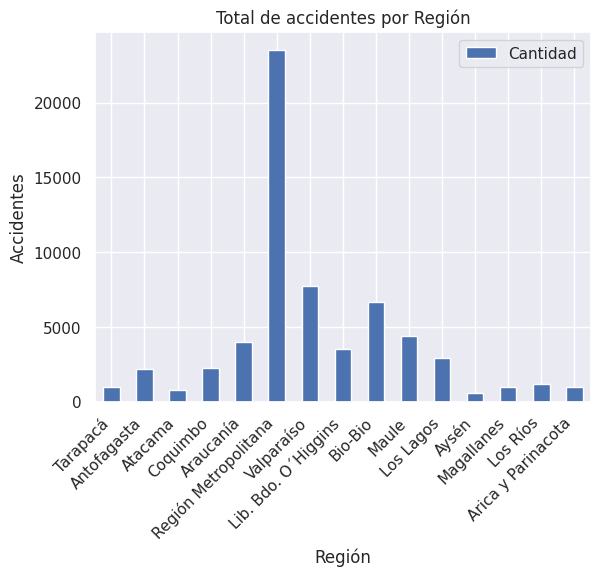

In [75]:
tipos_regional_2011.plot.bar("Descripcion", "Cantidad")
plt.title("Total de accidentes por Región")
plt.xlabel("Región")
plt.ylabel("Accidentes")
plt.xticks(rotation=45, ha="right")
plt.show()


R: Se puede observar que la región Metropolitana es la región con mayor cantidad de accidentes pero este dato no es concluyente puesto que desconocemos la población regional. Respecto a si es razonable el uso de este gráfico para **determinar las regiones más peligrosas** con los datos actuales claramente no, pero si corregimos los mismos sacando la métrica per capita entonces se vuelve una buena alternativa para visualizar lo pedido

5. Filtre los datos para incluir sólo los accidentes ocurridos el año 2010 a nivel regional. Genere un boxplot donde se indique la cantidad de accidentes categorizado por tipo de accidente. ¿Cuáles son sus principales observaciones?

In [76]:
tipos_regional_2010 = tipos[(tipos["Anio"] == 2010) & (tipos["Muestra"] == "Regional")].groupby("TipoAccidente")["Cantidad"].sum().reset_index()
tipos_regional_2010

,TipoAccidente,Cantidad
0,Atropello,8247
1,Caida,1478
2,Choque,14558
3,Colision,29127
4,Otros,707
5,Volcadura,3629


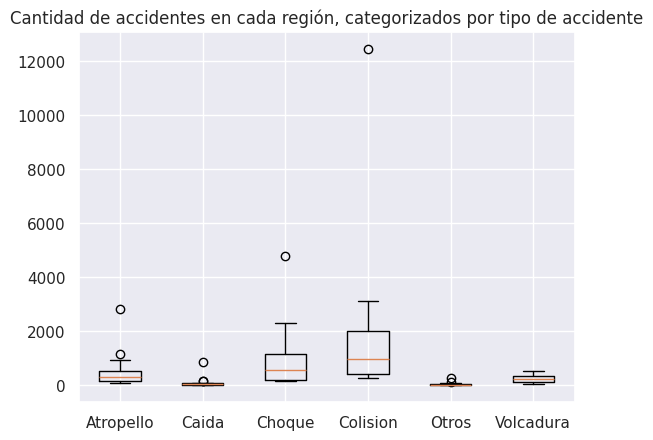

In [106]:
grouped = tipos[(tipos["Anio"] == 2010) & (tipos["Muestra"] == "Regional")].groupby("TipoAccidente")
labels = []
amounts = []
for label, group in grouped:
    labels.append(label)
    amounts.append(group["Cantidad"])
plt.boxplot(amounts, tick_labels=labels)
plt.title("Cantidad de accidentes en cada región, categorizados por tipo de accidente")
plt.show()


Se puede ver que la mayoría de regiones cuentan con grandes cantidades de Choque y Colision, y un poco de Atropello, pero poco o nada de los demás tipos de accidente. Colision es el tipo con el mínimo más alto (comparando con todas las regiones), y además tiene un máximo muy alto que consideraremos como outlier gracias a la visualización. Ignorando los outliers, Colision sigue siendo el tipo de accidente que domina. (???????

6. ¿Qué otra forma de explorar los datos podría agregar para el dataset de Accidentes de tránsito y qué información adicional aporta? Adjunte el código necesario.

Como se tienen datos de panel (aunque solo para dos periodos) se podría hacer un gráfico de línea para ver si los accidentes han aumentado (ya sea a nivel nacional o regional con varías rectas)

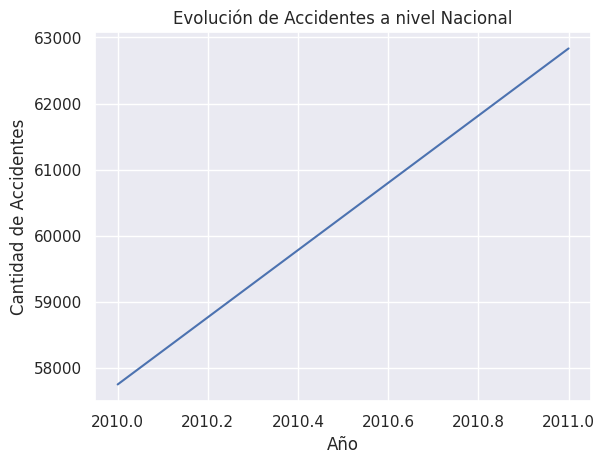

In [79]:
accidentes = tipos[tipos.Muestra == "Nacional"].groupby(["Anio", "Descripcion"])["Cantidad"].sum().reset_index()

sns.lineplot(accidentes, x="Anio", y="Cantidad")
plt.xlabel("Año")
plt.ylabel("Cantidad de Accidentes")
plt.title("Evolución de Accidentes a nivel Nacional")

plt.show()

## Diabetes
Considere el set de datos de pacientes para la predicción de diabetes con las siguientes columnas:

- gender: género del paciente
- age: edad del paciente
- hypertension: indica si el paciente tiene o no hipertensión
- heart_disease: indica si el paciente tiene o no enfermedad cardiaca
- smoking_history: indica si el paciente es o fue fumador
- bmi: indice de masa corporal del paciente
- HbA1c_level: Hemoglobina HbA1c del paciente
- blood_glucose_level: Nivel de glucosa en sangre del paciente
- diabetes: si el paciente tiene o no diabetes

In [80]:
diabetes = pd.read_csv("https://raw.githubusercontent.com/mzambrano1/Datasets-CC5205-otono-2023/master/lab1.2%202023-2/diabetes_prediction_dataset.csv")
diabetes.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


7. Para explorar el dataset, realice un análisis de frecuencias de los atributos categóricos (categorías binarias y multiclase).



Partimos revisando la cantidad de valores nulos por cada atributo.

In [93]:
diabetes.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

No hay valores nulos. Revisamos la cantidad de valores únicos por atributo:

In [81]:
diabetes.nunique()

gender                    3
age                     102
hypertension              2
heart_disease             2
smoking_history           6
bmi                    4247
HbA1c_level              18
blood_glucose_level      18
diabetes                  2
dtype: int64

Mirando el `head()` y la cantidad de valores únicos por columna, podemos deducir que `gender`, `hypertension`, `heart_disease`, `smoking_history` y `diabetes` corresponden a atributos categóricos.

Las categorías binarias son de verdadero/falso y se pueden visualizar en conjunto en la siguiente tabla.

In [83]:
diabetes[["hypertension", "heart_disease", "diabetes"]].apply(lambda col: col.value_counts())

,hypertension,heart_disease,diabetes
0,92515,96058,91500
1,7485,3942,8500


Las categorías multiclase se pueden ver por separado.

In [87]:
diabetes["gender"].value_counts().reset_index()

,gender,count
0,Female,58552
1,Male,41430
2,Other,18


In [104]:
diabetes["smoking_history"].value_counts().reset_index()

,smoking_history,count
0,No Info,35816
1,never,35095
2,former,9352
3,current,9286
4,not current,6447
5,ever,4004


8. Muestre estadísticas de resumen para las variables numéricas y comenten sus observaciones.

In [116]:
types = ["age", "bmi", "HbA1c_level", "blood_glucose_level"]
diabetes[types].describe()

,age,bmi,HbA1c_level,blood_glucose_level
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,27.320767,5.527507,138.058060
std,22.516840,6.636783,1.070672,40.708136
min,0.080000,10.010000,3.500000,80.000000
25%,24.000000,23.630000,4.800000,100.000000
50%,43.000000,27.320000,5.800000,140.000000
75%,60.000000,29.580000,6.200000,159.000000
max,80.000000,95.690000,9.000000,300.000000


Los datos son en su mayoría de gente muy adulta que en promedio se encuentra con sobrepeso (consultado con la oms) donde más del 50% es prediabetica segun los niveles de HbA1c y glucosa en sangre, por otro lado en lo que respecta a varianza en los datos, dejando de lado el nivel de glucosa en sangre y la covariable edad se tiene poca dispersión.

# Clasificación

Ahora crearemos un clasificador binario (por ahora no importa cómo funciona), y veremos que tal es su desempeño decidiendo si una persona tiene diabetes o no.

In [102]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Droppear categoricas
df_clf = diabetes.drop(columns=['gender', 'smoking_history'])
# Separar atributos y target
X = df_clf.drop(columns=['diabetes'])
y = df_clf['diabetes']
# Separar conjuntos de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# Entrenar modelo
clf = DecisionTreeClassifier(max_depth=3, random_state=0)
clf.fit(X_train, y_train)
# Obtener predicciones
y_pred = clf.predict(X_test)

### Veamos su matríz de confusión

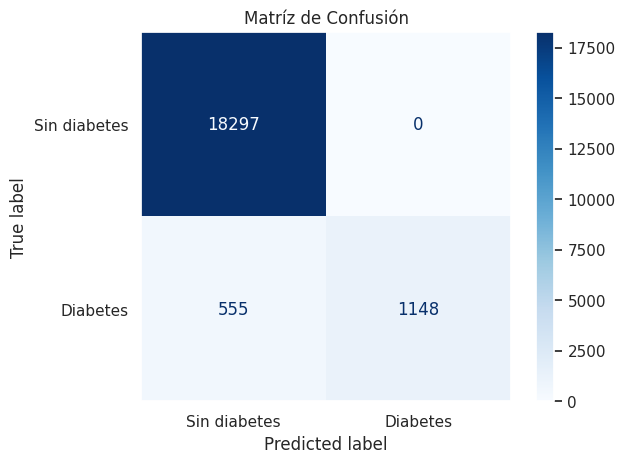

In [103]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Sin diabetes', 'Diabetes'])
disp.plot(cmap='Blues')
plt.grid(False)
plt.title('Matríz de Confusión')
plt.show()

9. ¿Qué se puede decir a partir de la matriz de confusión? ¿El clasificador tiene un problema asociado a precision o recall?

In [119]:
metricas = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))
metricas.transpose()

,precision,recall,f1-score,support
0,0.970560,1.000000,0.985060,18297.00000
1,1.000000,0.674105,0.805331,1703.00000
accuracy,0.972250,0.972250,0.972250,0.97225
macro avg,0.985280,0.837052,0.895196,20000.00000
weighted avg,0.973067,0.972250,0.969756,20000.00000


R: Que hay un desbalance entre los datos puesto que gran porcentaje de estos no contaba con diabetes, esta tendencia en los datos provocó que nuestro árbol de decisión sea optimista, etiquetando de manera incorrecta a pacientes que en efecto contaban con la enfermedad, esto se concluye por el bajo recall (un poco mejor que tirar los dados)

### Curva ROC 🤘

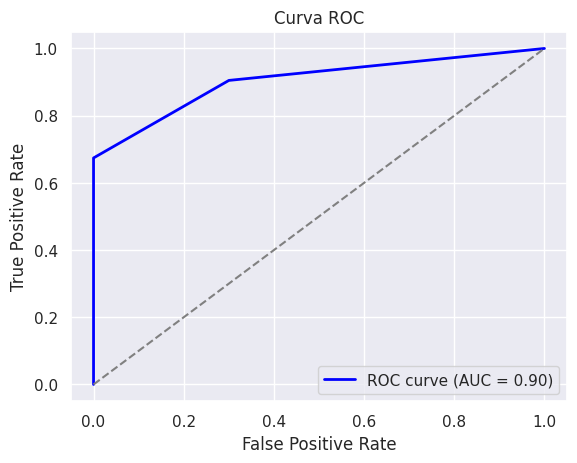

In [118]:
from sklearn.metrics import roc_curve, auc

y_scores = clf.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Identidad
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

10. ¿Podemos decir que el modelo es bueno según su curva ROC? ¿Para que podemos usar esta visualización?

R: Por supuesto que sí, aunque el problema se asemeja bastante al p-hacking estadístico. Es importante destacar que los datos están desbalanceados, lo que puede hacer que el modelo parezca muy bueno debido a su alta tasa de verdaderos positivos, pero esto no le resta lo peligroso de usar en la vida real

11. ¿Sería seguro usar este clasificador en un caso real diagnosticando pacientes?

R: Dado que la diabetes es una enfermedad crónica, una alta tasa de falsos negativos (~37%) se traduce en una cifra de muertes por negligencia no ignorable, con lo cual para efectos prácticos este modelo no sería para nada viable